In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
##### tgl 29 jam 12 malam

In [3]:
demo = pd.read_csv('county_facts.csv')
pri = pd.read_csv('primary_results.csv')

In [4]:
demo = demo[['fips','area_name','state_abbreviation','PST045214','RHI225214',
                             'RHI725214','RHI325214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210',
                             'VET605213','HSD410213','NES010213','SBO315207','SBO215207','SBO415207','SBO015207','INC910213',
                             'BZA110213']]
demo.rename(columns={'PST045214': 'Population','RHI225214':'Black','RHI725214':'Latino','RHI325214':'AmericanIndian',
                            'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'MediHouseInc','PVY020213':'Kurang Mampu','POP060210':'Density','VET605213':'Veteran',
                            'HSD410213':'Rumah Tangga','NES010213':'Pengangguran','SBO315207':'BlackownFirm','SBO215207':'AsianowmFirm',
                            'SBO415207':'LatinoownFirm','SBO015207':'WomenownFirm','INC910213':'incomepercapita','BZA110213':'Privatenonfarmemployment'}, inplace=True)
for col in demo.columns: 
    print(col) 

fips
area_name
state_abbreviation
Population
Black
Latino
AmericanIndian
White
HighSchool
Bachelors
MediHouseInc
Kurang Mampu
Density
Veteran
Rumah Tangga
Pengangguran
BlackownFirm
AsianowmFirm
LatinoownFirm
WomenownFirm
incomepercapita
Privatenonfarmemployment


In [5]:
#Reading Results CSV File
results = pd.read_csv('primary_results.csv')
results = results[results.party == "Republican"]
# results = results[(results.state != "Maine") & (results.state != "Massachusetts") & (results.state != "Vermont") & (results.state != "Illinois") ]
# results = results[(results.candidate != 'No Preference') & (results.candidate != ' Uncommitted')]
results = results[(results.candidate == "Donald Trump") | (results.candidate != "Donald Trump") ]
Rep = results
Rep.candidate.unique()

array(['Ben Carson', 'Donald Trump', 'John Kasich', 'Marco Rubio',
       'Ted Cruz', 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum'], dtype=object)

In [6]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() 
                for party in Rep.party.unique()]
for i in votesByState:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbsRep = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])


In [16]:
# allData = pd.merge(vbs, demo, how="inner", left_on = 'state',right_on = 'area_name')
# # allData.corr()['partyFrac']
# # allData.dropna()
# # allData.area_name.unique()
# allData

In [17]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# allData['state1']= le.fit_transform (allData['state'])
# allData.head()

In [18]:
# demo['state1']= le.fit_transform (demo['area_name'])
# demo.head()

In [7]:
#Merging demographics and results
allDataRep = pd.merge(vbsRep, demo, how="inner", left_on = 'state',right_on = 'area_name')
allDataRep.drop('state_abbreviation',axis=1, inplace=True)
allDataRep.head()
# #Segregate data candidate wise
DNT = allDataRep[(allDataRep.candidate == "Donald Trump")] #| (allData.candidate != "Donald Trump")]
DNT = DNT.reset_index();
DNT.drop('index',axis=1, inplace=True)


In [153]:
#Select X for Prediction
feature_cols = ['Population','Black','Latino','White','HighSchool','Bachelors','MediHouseInc','Kurang Mampu','Density','Veteran',
                'Rumah Tangga','Pengangguran','AsianowmFirm','LatinoownFirm','WomenownFirm','incomepercapita','Privatenonfarmemployment']
X = DNT[feature_cols]

#Select y for Prediction
y = DNT.partyFrac



In [22]:
# from sklearn.model_selection import train_test_split

In [23]:
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
# model.score(x_test, y_test)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

## Model

In [154]:
RFR = RandomForestRegressor(n_estimators=100000)
RID = Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
LASS = Lasso(max_iter=100000)
ELA = ElasticNet(max_iter=100000)
LIN = LinearRegression()

#train model
RFR.fit(X,y)
RID.fit(X,y)
LASS.fit(X,y)
ELA.fit(X,y)
LIN.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
from numpy.polynomial.polynomial import polyfit

Text(0.5, 1.0, 'Linear Regression')

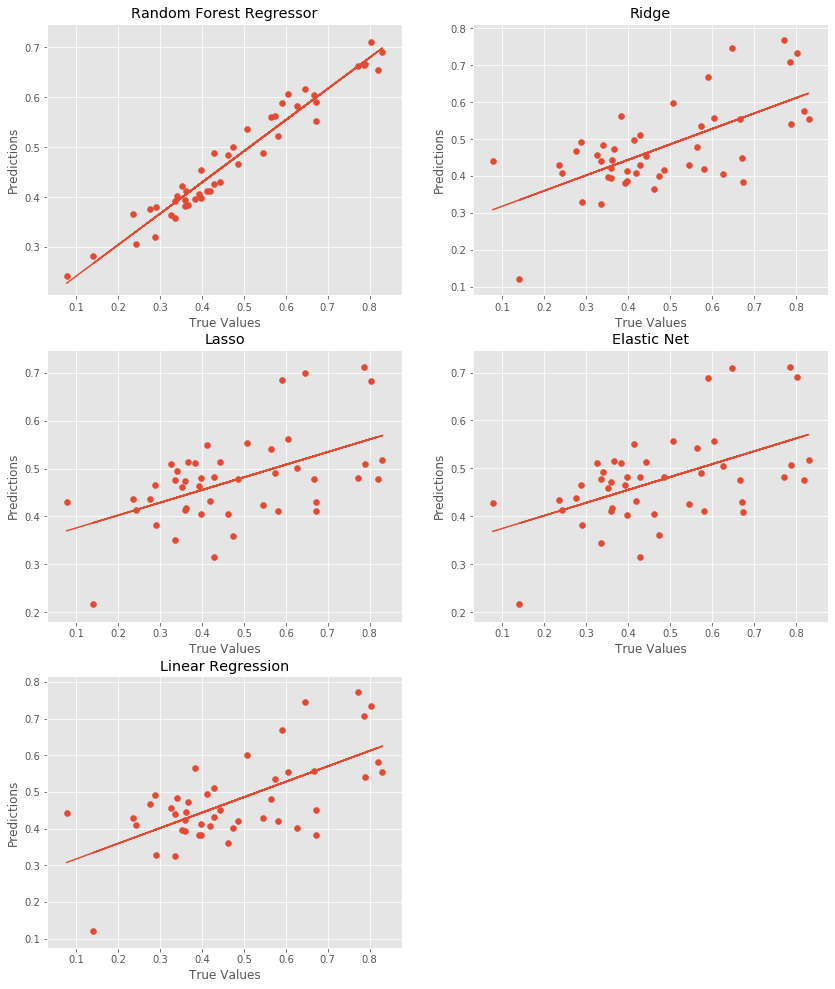

In [155]:
plt.figure(figsize=(14,17))

plt.subplot(321)
p = RFR.predict(X)
plt.scatter(y, p)
b, m = polyfit(y, p, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor')

plt.subplot(322)
pp = RID.predict(X)
plt.scatter(y, pp)
b, m = polyfit(y, pp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge')


plt.subplot(323)
ppp = LASS.predict(X)
plt.scatter(y, ppp)
b, m = polyfit(y, ppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso')


plt.subplot(324)
pppp = ELA.predict(X)
plt.scatter(y, pppp)
b, m = polyfit(y, pppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Elastic Net')


plt.subplot(325)
ppppp = LIN.predict(X)
plt.scatter(y, ppppp)
b, m = polyfit(y, ppppp, 1)
plt.plot(y, b + m * y, '-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')



-------------------------------------------------

In [156]:
print('Train accuracy score')
print('--------------------------')
print('RandomForestRegressor:',RFR.score(X,y))
print('Ridge :',RID.score(X,y))
print('Lasso: ',LASS.score(X,y))
print('Elastic Net : ',ELA.score(X,y))
print('Linear Regression: ',LIN.score(X,y))
  

Train accuracy score
--------------------------
RandomForestRegressor: 0.8400516593811698
Ridge : 0.42131516258218427
Lasso:  0.2716069245194762
Elastic Net :  0.2721757746373965
Linear Regression:  0.42142694419065313


------------------------------------------------------------

In [157]:
#test model
demo1=demo[(demo.area_name=='Alaska')]
demo2=demo[(demo.area_name=='Connecticut')]
demo3=demo[(demo.area_name=='Maryland')]
demo4=demo[(demo.area_name=='Alabama')]
demo5=demo[(demo.area_name=='New York')]
demo6=demo[(demo.area_name=='Pennsylvania')]
demo7=demo[(demo.area_name=='Florida')]
demo8=demo[(demo.area_name=='Georgia')]
demo9=demo[(demo.area_name=='Wisconsin')]
demo10=demo[(demo.area_name=='Oklahoma')]
demo11=demo[(demo.area_name=='Nevada')]
demo12=demo[(demo.area_name=='Missouri')]
demo13=demo[(demo.area_name=='Michigan')]


## Random Forest Regressor

In [158]:
X_test1=demo1[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.array(y_pred4);

X_test1=demo2[feature_cols]
y_pred4=RFR.predict(X_test1)
xx = np.append(xx, y_pred4[0]);

X_test1=demo3[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo4[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo5[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo6[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo7[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo8[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo9[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo10[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo11[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);


X_test1=demo12[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

X_test1=demo13[feature_cols]
y_pred4=RFR.predict(X_test1)
xx=np.append(xx, y_pred4[0]);

In [159]:
a = DNT[(DNT.state == 'New Jersey')]
a = a['partyFrac'].mean()
a

0.8038713254185034

In [160]:
pred =pd.Series(xx, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia',
                           'Wisconsin','Oklahoma','Nevada','Missouri','Michigan']) 
x1 = np.array([.33,.59,.565,.443,.604,.580,.473,.393,.360,.287,.461,.418,.384])
real = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia',
                            'Wisconsin','Oklahoma','Nevada','Missouri','Michigan'])

              Predicted   Real
Alaska         0.392850  0.330
Connecticut    0.588774  0.590
Maryland       0.559888  0.565
Alabama        0.430849  0.443
New York       0.605614  0.604
Pennsylvania   0.522100  0.580
Florida        0.500483  0.473
Georgia        0.406721  0.393
Wisconsin      0.382897  0.360
Oklahoma       0.319357  0.287
Nevada         0.483343  0.461
Missouri       0.412849  0.418
Michigan       0.396782  0.384


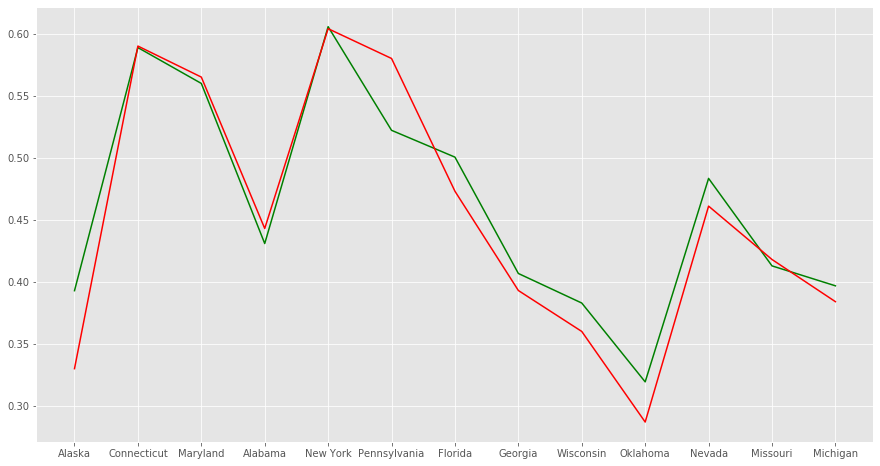

In [161]:
e = {'Predicted' : pred,'Real' : real}
final=pd.DataFrame(e)
print(final)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred,'g')  # Pred
plt.plot(real,'r') # Real
plt.show()

In [162]:
# print(np.sqrt(mean_squared_error(a,b)))
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score


print(f'MAX ERROR RFR : {round(max_error(pred,real),3)*100}')
print(f'MSE RFR : {round(mse(pred,real),5)} ')
print(f'MAE RFR: {round(mae(pred,real),3)*100} ')
print(f'MDAE RFR: {round(mdae(pred,real),3)*100} ')
print(f'RMSLE RFR: {round(np.sqrt(msle(pred,real)),3)*100} ')
print(f'R2 Score RFR : {round(r2_score(pred,real),3)*100} ')

MAX ERROR RFR : 6.3
MSE RFR : 0.00082 
MAE RFR: 2.1 
MDAE RFR: 1.4000000000000001 
RMSLE RFR: 2.0 
R2 Score RFR : 88.6 


### Lasso

In [123]:
X_test2=demo1[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo2[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo3[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo4[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo5[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo6[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo7[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo8[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo9[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo10[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo11[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo12[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo13[feature_cols]
y_pred2=LASS.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);


In [121]:
a = DNT[(DNT.state == 'New York')]
a = a['partyFrac'].mean()
a

0.6040734786596347

In [125]:
pred2 =pd.Series(xx2, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])
x1 = np.array([.33,.59,.565,.443,.604,.580,.473,.393])
real2 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])

              Predicted   Real
Alaska         0.459695  0.330
Connecticut    0.370781  0.590
Maryland       0.439228  0.565
Alabama        0.443376  0.443
New York       0.462687  0.604
Pennsylvania   0.429141  0.580
Florida        0.452931  0.473
Georgia        0.424135  0.393


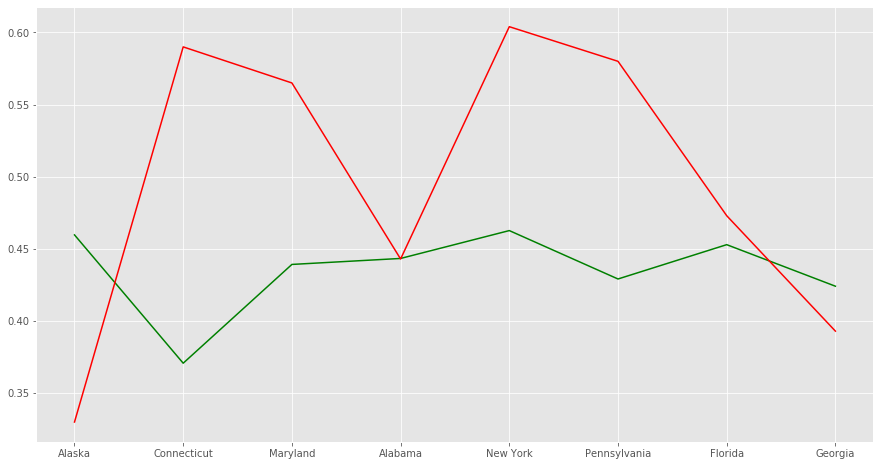

In [126]:
f = {'Predicted' : pred2,'Real' : real2}
final2=pd.DataFrame(f)
print(final2)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred2,'g')  # Pred
plt.plot(real2,'r') # Real
plt.show()


In [127]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR LASSO : {round(max_error(pred2,real2),2)*100} ')
print(f'MSE LASSO : {(round(mse(pred2,real2),3))*100} ')
print(f'RMSE LASSO : {np.sqrt(round(mse(pred2,real2),3)*100)} ')
print(f'MAE LASSO: {round(mae(pred2,real2),2)*100} ')
print(f'MDAE LASSO: {round(mdae(pred2,real2),2)*100} ')
print(f'RMSLE LASSO : {round(np.sqrt(msle(pred2,real2)),3)*100} ')
print(f'R2 Score LASSO : {round(r2_score(pred2,real2),2)*100} ')

MAX ERROR LASSO : 22.0 
MSE LASSO : 1.6 
RMSE LASSO : 1.2649110640673518 
MAE LASSO: 10.0 
MDAE LASSO: 13.0 
RMSLE LASSO : 8.4 
R2 Score LASSO : -1959.0 


### RIDGE

In [136]:
X_test3=demo1[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.array(y_pred3);

X_test3=demo2[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo3[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo4[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo5[feature_cols]
y_pred3=RID.predict(X_test3)
xx3=np.append(xx3, y_pred3[0]);

X_test3=demo6[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3,y_pred2);

X_test3=demo7[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3, y_pred2[0]);

X_test3=demo8[feature_cols]
y_pred3=RID.predict(X_test2)
xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo9[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo10[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo11[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo12[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

# X_test3=demo13[feature_cols]
# y_pred3=RID.predict(X_test2)
# xx3=np.append(xx3, y_pred2[0]);

In [137]:
pred3 =pd.Series(xx3, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia']) 
x2 = np.array([.33,.59,.565,.443,.604,.580,.473,.393])
real3 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia'])

              Predicted   Real
Alaska         0.331089  0.330
Connecticut    0.664844  0.590
Maryland       0.458805  0.565
Alabama        0.434913  0.443
New York       0.540178  0.604
Pennsylvania   0.424135  0.580
Florida        0.424135  0.473
Georgia        0.424135  0.393


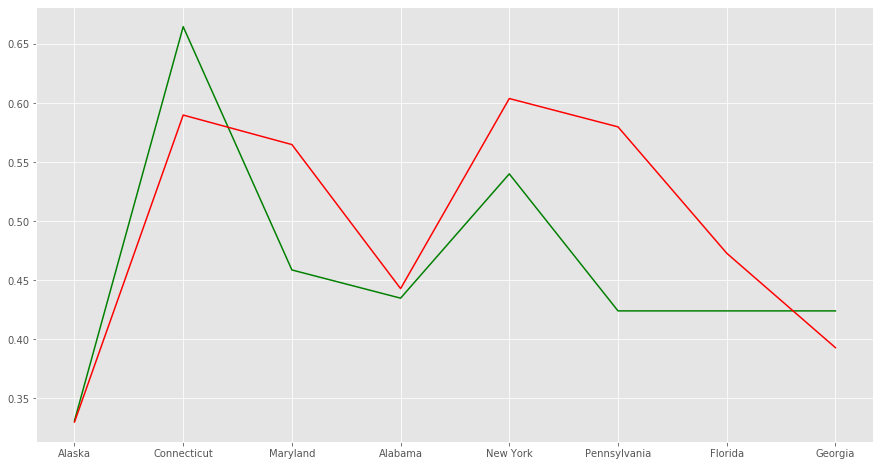

In [138]:
g = {'Predicted' :pred3,'Real' :real3}
final3=pd.DataFrame(g)
print(final3)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred3,'g')  # Pred
plt.plot(real3,'r') # Real
plt.show()


In [139]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR RIDGE : {round(max_error(pred3,real3),2)*100} ')
print(f'MSE RIDGE : {(round(mse(pred3,real3),3))*100} ')
print(f'RMSE RIDGE : {np.sqrt(round(mse(pred3,real3),3)*100)} ')
print(f'MAE RIDGE : {round(mae(pred3,real3),2)*100} ')
print(f'MDAE RIDGE : {round(mdae(pred3,real3),2)*100} ')
print(f'RMSLE RIDGE : {round(np.sqrt(msle(pred3,real3)),3)*100} ')
print(f'R2 Score RIDGE : {round(r2_score(pred3,real3),2)*100} ')

MAX ERROR RIDGE : 16.0 
MSE RIDGE : 0.6 
RMSE RIDGE : 0.7745966692414834 
MAE RIDGE : 6.0 
MDAE RIDGE : 6.0 
RMSLE RIDGE : 5.1 
R2 Score RIDGE : 30.0 


In [ ]:
'Alaska','Connecticut','Maryland','Alabama','New York','Pennsylvania','Florida','Georgia',
                           'Wisconsin','Oklahoma','Nevada','Missouri','Michigan'

In [144]:
print ("Future Pedictions - Donald Trump")

#Select Future States 
#Change name of state for other states
demo20=demo[(demo.area_name=='Arkansas')]
demo21=demo[(demo.area_name=='New Hampshire')]
demo22=demo[(demo.area_name=='Texas')]
demo23=demo[(demo.area_name=='Arizona')]
demo24=demo[(demo.area_name=='North Carolina')]
demo25=demo[(demo.area_name=='Ohio')]
demo26=demo[(demo.area_name=='New Mexico')]
demo27=demo[(demo.area_name=='Oregon')]


X_test1=demo20[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Arkansas = {(round((y_pred4[0])*100))} %')

X_test1=demo21[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'New Hampshire = {(round((y_pred4[0])*100))} %')

X_test1=demo22[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Texas = {(round((y_pred4[0])*100))} %')

X_test1=demo23[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Arizona = {(round((y_pred4[0])*100))} %')

X_test1=demo24[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'North Carolina = {(round((y_pred4[0])*100))} %')

X_test1=demo25[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Ohio = {(round((y_pred4[0])*100))} %')

X_test1=demo26[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'New Mexico = {(round((y_pred4[0])*100))} %')

X_test1=demo27[feature_cols]
y_pred4=RFR.predict(X_test1)
print (f'Oregon = {(round((y_pred4[0])*100))} %')


Future Pedictions - Donald Trump
Arkansas = 36.0 %
New Hampshire = 39.0 %
Texas = 37.0 %
Arizona = 56.0 %
North Carolina = 41.0 %
Ohio = 41.0 %
New Mexico = 66.0 %
Oregon = 61.0 %


In [149]:
a = DNT[(DNT.state == 'Oregon')]
a = a['partyFrac'].mean()
a

0.6661429085175247